乐学偶得版权所有  公众号：乐学Fintech  主讲人：William LX_LAB教研团队提供技术支持 正版视频： 网易云课堂：乐学偶得

1.Amazon电商名称及价格爬虫

In [2]:
import requests
from bs4 import BeautifulSoup

URL = 'https://www.amazon.cn/dp/B07PRQS9QH/ref=sr_1_1?__mk_zh_CN=%E4%BA%9A%E9%A9%AC%E9%80%8A%E7%BD%91%E7%AB%99&keywords=alienware&qid=1573223467&sr=8-1'

# Use Chrome chrome://version/ to check your user-agent,
# you can also use  IETF's tool page :https://tools.ietf.org/html/rfc2616#section-14.4 to choose header
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Accept-Encoding': 'gzip',
    'DNT': '1',  # Do not track Request Header
    'Connection': 'close'
}


def track_our_price_and_send_mail():
    page = requests.get(URL, headers=headers)

    soup_obj = BeautifulSoup(page.content, 'html.parser')

    product_name = soup_obj.find(id='productTitle').get_text()
    product_price = soup_obj.find(id='priceblock_ourprice').get_text()

    # if the following code didn't work , try to replace , with blank
    # method 1: convert_product_price_string_to_float=float(product_price[0:5])
    # method 2
    convert_product_price_string_to_float = float(product_price[1:7].replace(",", ""))

    # if (convert_product_price_string_to_float <25000):
    #     send_a_mail_to_notify_me()

    # print(soup_obj.prettify())
    # print(product_name.strip())
    # print(convert_product_price_string_to_float)
    # print(type(convert_product_price_string_to_float))


2.上市公司定期报告爬虫

1）用Chrome浏览器打开网页：我们给网站发了一个请求，网站跟我们返回了一系列信息，这一系列信息通过浏览器+JavaScript程序的综合作用，把页面呈现给了你

2）发的请求是什么？


（1）这个部分是网址

http://query.sse.com.cn/security/stock/queryCompanyBulletin.do


（2）这个是标志
?

（3）这后面的，是请求参数

jsonCallBack=jsonpCallback84550&isPagination=true&productId=&keyWord=&securityType=0101%2C120100%2C020100%2C020200%2C120200&reportType2=&reportType=ALL&beginDate=2019-11-01&endDate=2019-11-19&pageHelp.pageSize=25&pageHelp.pageCount=50&pageHelp.pageNo=1&pageHelp.beginPage=1&pageHelp.cacheSize=1&pageHelp.endPage=5&_=1574156671185


*思想——类比破解甲骨文
我们可以先“人肉”解析一下


变更一下你可以控制的选项，再次发一个query

jsonCallBack=jsonpCallback64552&isPagination=true&productId=&keyWord=&securityType=0101%2C120100%2C020100%2C020200%2C120200&


reportType2=

DQBG（推测：可能是“定期报告”的首字母）

&reportType=QUATER2



&beginDate=2019-07-01

&endDate=2019-07-30

&pageHelp.pageSize=25&pageHelp.pageCount=50


&pageHelp.pageNo=1


&pageHelp.beginPage=1&pageHelp.cacheSize=1&pageHelp.endPage=5&_=1574174285318

第二页，验证猜测

jsonCallBack=jsonpCallback14505&isPagination=true&productId=&keyWord=&securityType=0101%2C120100%2C020100%2C020200%2C120200&reportType2=DQBG&reportType=QUATER2&beginDate=2019-07-01&endDate=2019-07-30&pageHelp.pageSize=25&pageHelp.pageCount=50



&pageHelp.pageNo=2



&pageHelp.beginPage=2&pageHelp.cacheSize=1&pageHelp.endPage=21&_=1574174285319

jsonCallBack: jsonpCallback72351
isPagination: true
productId: 
keyWord: 
securityType: 0101,120100,020100,020200,120200
reportType2: DQBG
reportType: QUATER2
beginDate: 2019-07-01
endDate: 2019-07-30
pageHelp.pageSize: 25
pageHelp.pageCount: 50
pageHelp.pageNo: 1
pageHelp.beginPage: 1
pageHelp.cacheSize: 1
pageHelp.endPage: 5
_: 1574174285320


jsonCallBack: jsonpCallback93536
isPagination: true
productId: 
keyWord: 
securityType: 0101,120100,020100,020200,120200
reportType2: DQBG
reportType: QUATER2
beginDate: 2019-07-01
endDate: 2019-07-30
pageHelp.pageSize: 25
pageHelp.pageCount: 50
pageHelp.pageNo: 2
pageHelp.beginPage: 2
pageHelp.cacheSize: 1
pageHelp.endPage: 21
_: 1574174285321

Referer: http://www.sse.com.cn/disclosure/listedinfo/announcement/

当你向服务器发出请求之后，服务器会给你返回一系列的信息：

jsonpCallback67796({"beginDate":"2019-11-01","endDate":"2019-11-20","isNew":null,"isPagination":"true","jsonCallBack":"jsonpCallback67796","keyWord":"","pageHelp":{"beginPage":1,"cacheSize":1,"data":[{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"半年报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"688088","SSEDATE":"2019-11-18","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"虹软科技2019年半年度报告（修订版）","URL":"\/disclosure\/listedinfo\/bulletin\/star\/c\/688088_2019_zA.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"半年报摘要","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"688088","SSEDATE":"2019-11-18","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"虹软科技2019年半年度报告摘要（修订版）","URL":"\/disclosure\/listedinfo\/bulletin\/star\/c\/688088_2019_zzyA.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600289","SSEDATE":"2019-11-15","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"*ST信通2019年第三季度报告（修订版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-15\/600289_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600513","SSEDATE":"2019-11-12","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"联环药业2019年第三季度报告（更正版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-12\/600513_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600877","SSEDATE":"2019-11-12","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"*ST电能2019年第三季度报告（更正版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-12\/600877_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600715","SSEDATE":"2019-11-09","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"文投控股2019年第三季度报告（更正版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-09\/600715_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600781","SSEDATE":"2019-11-09","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"ST辅仁2019年第三季度报告（更正版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-09\/600781_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"年报","BULLETIN_YEAR":"2018","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600238","SSEDATE":"2019-11-05","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"ST椰岛2018年年度报告（更新后）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-05\/600238_2018_nC.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"601595","SSEDATE":"2019-11-05","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"上海电影2019年第三季度报告（更新版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-05\/601595_2019_3C.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600526","SSEDATE":"2019-11-02","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"*ST菲达2019年第三季度报告（更正版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-02\/600526_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600726","SSEDATE":"2019-11-01","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"*ST华源2019年第三季度报告（更正后）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-01\/600726_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null}],"endDate":null,"endPage":5,"objectResult":null,"pageCount":1,"pageNo":1,"pageSize":25,"searchDate":null,"sort":null,"startDate":null,"total":11},"productId":"","reportType":"ALL","reportType2":"DQBG","result":[{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"半年报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"688088","SSEDATE":"2019-11-18","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"虹软科技2019年半年度报告（修订版）","URL":"\/disclosure\/listedinfo\/bulletin\/star\/c\/688088_2019_zA.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"半年报摘要","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"688088","SSEDATE":"2019-11-18","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"虹软科技2019年半年度报告摘要（修订版）","URL":"\/disclosure\/listedinfo\/bulletin\/star\/c\/688088_2019_zzyA.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600289","SSEDATE":"2019-11-15","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"*ST信通2019年第三季度报告（修订版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-15\/600289_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600513","SSEDATE":"2019-11-12","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"联环药业2019年第三季度报告（更正版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-12\/600513_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600877","SSEDATE":"2019-11-12","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"*ST电能2019年第三季度报告（更正版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-12\/600877_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600715","SSEDATE":"2019-11-09","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"文投控股2019年第三季度报告（更正版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-09\/600715_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600781","SSEDATE":"2019-11-09","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"ST辅仁2019年第三季度报告（更正版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-09\/600781_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"年报","BULLETIN_YEAR":"2018","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600238","SSEDATE":"2019-11-05","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"ST椰岛2018年年度报告（更新后）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-05\/600238_2018_nC.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"601595","SSEDATE":"2019-11-05","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"上海电影2019年第三季度报告（更新版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-05\/601595_2019_3C.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600526","SSEDATE":"2019-11-02","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"*ST菲达2019年第三季度报告（更正版）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-02\/600526_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null},{"BULLETIN_HEADING":null,"BULLETIN_TYPE":"第三季度季报","BULLETIN_YEAR":"2019","INDEXCLASS":null,"PLAN_Date":null,"PLAN_Year":null,"ROWNUM":null,"ROWNUM_":null,"SECURITY_CODE":"600726","SSEDATE":"2019-11-01","SSEDate":null,"SSETime":null,"SSETimeStr":null,"TITLE":"*ST华源2019年第三季度报告（更正后）","URL":"\/disclosure\/listedinfo\/announcement\/c\/2019-11-01\/600726_2019_3A.pdf","author":null,"book_Name":null,"bulletinHeading":null,"bulletinType":null,"bulletin_No":null,"bulletin_Type":null,"bulletin_Year":null,"category_A":null,"category_B":null,"category_C":null,"category_D":null,"chapter_No":null,"companyAbbr":null,"dispatch_Organ":null,"file_Serial":null,"finish_Time":null,"initial_Date":null,"isChangeFlag":null,"journal_Issue":null,"journal_Name":null,"journal_Section":null,"journal_Year":null,"keyWord":null,"key_Word":null,"language":null,"lemma_CN":null,"lemma_EN":null,"publishing_Comp":null,"question":null,"question_Class":null,"read_Status":null,"save_Time":null,"section":null,"security_Code":null,"source":null,"spareVolEnd":null,"title":null,"title_ETC":null,"title_PY":null,"unit_Code":null,"unit_Type":null}],"secCodes":null,"securityType":"0101,120100,020100,020200,120200"})





jsonpCallback67796({beginDate: "2019-11-01", endDate: "2019-11-20", isNew: null, isPagination: "true",…})
beginDate: "2019-11-01"
endDate: "2019-11-20"
isNew: null
isPagination: "true"
jsonCallBack: "jsonpCallback67796"
keyWord: ""
pageHelp: {beginPage: 1, cacheSize: 1,…}
beginPage: 1
cacheSize: 1
data: [{BULLETIN_HEADING: null, BULLETIN_TYPE: "半年报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…},…]
0: {BULLETIN_HEADING: null, BULLETIN_TYPE: "半年报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
1: {BULLETIN_HEADING: null, BULLETIN_TYPE: "半年报摘要", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
2: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
3: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
4: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
5: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
6: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
7: {BULLETIN_HEADING: null, BULLETIN_TYPE: "年报", BULLETIN_YEAR: "2018", INDEXCLASS: null, PLAN_Date: null,…}
8: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
9: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
10: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
endDate: null
endPage: 5
objectResult: null
pageCount: 1
pageNo: 1
pageSize: 25
searchDate: null
sort: null
startDate: null
total: 11
productId: ""
reportType: "ALL"
reportType2: "DQBG"
result: [{BULLETIN_HEADING: null, BULLETIN_TYPE: "半年报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…},…]
0: {BULLETIN_HEADING: null, BULLETIN_TYPE: "半年报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
1: {BULLETIN_HEADING: null, BULLETIN_TYPE: "半年报摘要", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
2: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
3: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
4: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
5: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
6: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
7: {BULLETIN_HEADING: null, BULLETIN_TYPE: "年报", BULLETIN_YEAR: "2018", INDEXCLASS: null, PLAN_Date: null,…}
8: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
9: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
10: {BULLETIN_HEADING: null, BULLETIN_TYPE: "第三季度季报", BULLETIN_YEAR: "2019", INDEXCLASS: null,…}
secCodes: null
securityType: "0101,120100,020100,020200,120200"

当走完request以及response的流程之后，就开始分析下载动作：

点开定期报告连接：
http://static.sse.com.cn/disclosure/listedinfo/announcement/c/

报告发布时期
2019-11-05/

报告名字
601595_2019_3C.pdf

http://static.sse.com.cn/disclosure/listedinfo/announcement/c/  2019-11-09/  600715_2019_3A.pdf

报告发布时期

2019-11-09/

报告名字
600715_2019_3A.pdf

{'beginDate': '2019-11-01', 'endDate': '2019-11-19', 'isNew': None, 'isPagination': 'true', 'jsonCallBack': 'jsonpCallback84550', 'keyWord': '', 'pageHelp': {'beginPage': 1, 'cacheSize': 1, 'data': [{'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600008', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '首创股份关于超短期融资券获中国银行间市场交易商协会注册的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600008_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '公司债', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600008', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '首创股份2018年公开发行绿色公司债券2019年付息公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600008_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600017', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '日照港关于注销募集资金专户的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600017_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600021', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '上海电力2019年度第二期中期票据发行结果公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600021_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600022', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '山东钢铁第六届监事会第十二次会议决议公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600022_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600050', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中国联通关于召开2019年第二次临时股东大会的通知', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600050_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600050', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中国联通关于中国联合网络通信有限公司完成发行2019年度第一期中期票据的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600050_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600071', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '凤凰光学关于重大资产重组相关事项获得中国电子科技集团有限公司批复的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600071_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600078', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '澄星股份关于2019年第二次临时股东大会更正补充公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600078_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '会议资料', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600078', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '澄星股份2019年第二次临时股东大会会议资料', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600078_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600083', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '博信股份关于控股股东股份被轮候冻结的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600083_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600086', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '东方金钰董监高减持股份结果公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600086_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600086', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '东方金钰关于债务到期未能清偿的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600086_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600118', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中国卫星关于北京星地恒通信息科技有限公司51%股权公开挂牌转让终止的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600118_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600129', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '太极集团关于归还部分使用闲置募集资金补充流动资金的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600129_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '公司债', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600143', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '金发科技：关于金发科技股份有限公司公开发行2016年公司债券（第一期）2019年度第一次债券持有人会议决议公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600143_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '公司债', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600143', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '金发科技：广东南国德赛律师事务所关于金发科技公开发行2016年公司债券（第一期）2019年度第一次债券持有人会议的法律意见书', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600143_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '会议资料', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600150', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中国船舶2019年第三次临时股东大会会议资料', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600150_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600158', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中体产业第七届董事会2019年第十次临时会议决议公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600158_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600158', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中体产业独立董事关于公司第七届董事会2019年第十次临时会议相关事项的独立意见', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600158_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600158', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中体产业独立董事关于公司第七届董事会2019年第十次临时会议相关事项的事前认可意见', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600158_20191119_3.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600158', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中体产业关于延长发行股份及支付现金购买资产并募集配套资金暨关联交易决议有效期及股东大会授权董事会全权办理本次交易相关事宜期限的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600158_20191119_4.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600158', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中体产业关于召开2019年第一次临时股东大会的通知', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600158_20191119_5.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600162', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '香江控股第九届董事会第六次会议决议公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600162_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600162', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '香江控股：西南证券股份有限公司关于深圳香江控股股份有限公司使用部分闲置募集资金暂时补充流动资金的核查意见（一次重组）', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600162_20191119_10.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}], 'endDate': None, 'endPage': 5, 'objectResult': None, 'pageCount': 233, 'pageNo': 1, 'pageSize': 25, 'searchDate': None, 'sort': None, 'startDate': None, 'total': 5823}, 'productId': '', 'reportType': 'ALL', 'reportType2': '', 'result': [{'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600008', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '首创股份关于超短期融资券获中国银行间市场交易商协会注册的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600008_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '公司债', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600008', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '首创股份2018年公开发行绿色公司债券2019年付息公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600008_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600017', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '日照港关于注销募集资金专户的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600017_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600021', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '上海电力2019年度第二期中期票据发行结果公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600021_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600022', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '山东钢铁第六届监事会第十二次会议决议公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600022_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600050', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中国联通关于召开2019年第二次临时股东大会的通知', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600050_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600050', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中国联通关于中国联合网络通信有限公司完成发行2019年度第一期中期票据的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600050_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600071', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '凤凰光学关于重大资产重组相关事项获得中国电子科技集团有限公司批复的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600071_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600078', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '澄星股份关于2019年第二次临时股东大会更正补充公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600078_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '会议资料', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600078', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '澄星股份2019年第二次临时股东大会会议资料', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600078_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600083', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '博信股份关于控股股东股份被轮候冻结的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600083_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600086', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '东方金钰董监高减持股份结果公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600086_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600086', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '东方金钰关于债务到期未能清偿的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600086_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600118', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中国卫星关于北京星地恒通信息科技有限公司51%股权公开挂牌转让终止的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600118_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600129', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '太极集团关于归还部分使用闲置募集资金补充流动资金的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600129_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '公司债', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600143', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '金发科技：关于金发科技股份有限公司公开发行2016年公司债券（第一期）2019年度第一次债券持有人会议决议公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600143_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '公司债', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600143', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '金发科技：广东南国德赛律师事务所关于金发科技公开发行2016年公司债券（第一期）2019年度第一次债券持有人会议的法律意见书', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600143_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '会议资料', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600150', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中国船舶2019年第三次临时股东大会会议资料', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600150_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600158', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中体产业第七届董事会2019年第十次临时会议决议公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600158_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600158', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中体产业独立董事关于公司第七届董事会2019年第十次临时会议相关事项的独立意见', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600158_20191119_2.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600158', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中体产业独立董事关于公司第七届董事会2019年第十次临时会议相关事项的事前认可意见', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600158_20191119_3.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600158', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中体产业关于延长发行股份及支付现金购买资产并募集配套资金暨关联交易决议有效期及股东大会授权董事会全权办理本次交易相关事宜期限的公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600158_20191119_4.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600158', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '中体产业关于召开2019年第一次临时股东大会的通知', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600158_20191119_5.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600162', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '香江控股第九届董事会第六次会议决议公告', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600162_20191119_1.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}, {'BULLETIN_HEADING': None, 'BULLETIN_TYPE': '其它', 'BULLETIN_YEAR': '2019', 'INDEXCLASS': None, 'PLAN_Date': None, 'PLAN_Year': None, 'ROWNUM': None, 'ROWNUM_': None, 'SECURITY_CODE': '600162', 'SSEDATE': '2019-11-19', 'SSEDate': None, 'SSETime': None, 'SSETimeStr': None, 'TITLE': '香江控股：西南证券股份有限公司关于深圳香江控股股份有限公司使用部分闲置募集资金暂时补充流动资金的核查意见（一次重组）', 'URL': '/disclosure/listedinfo/announcement/c/2019-11-19/600162_20191119_10.pdf', 'author': None, 'book_Name': None, 'bulletinHeading': None, 'bulletinType': None, 'bulletin_No': None, 'bulletin_Type': None, 'bulletin_Year': None, 'category_A': None, 'category_B': None, 'category_C': None, 'category_D': None, 'chapter_No': None, 'companyAbbr': None, 'dispatch_Organ': None, 'file_Serial': None, 'finish_Time': None, 'initial_Date': None, 'isChangeFlag': None, 'journal_Issue': None, 'journal_Name': None, 'journal_Section': None, 'journal_Year': None, 'keyWord': None, 'key_Word': None, 'language': None, 'lemma_CN': None, 'lemma_EN': None, 'publishing_Comp': None, 'question': None, 'question_Class': None, 'read_Status': None, 'save_Time': None, 'section': None, 'security_Code': None, 'source': None, 'spareVolEnd': None, 'title': None, 'title_ETC': None, 'title_PY': None, 'unit_Code': None, 'unit_Type': None}], 'secCodes': None, 'securityType': '0101,120100,020100,020200,120200'}


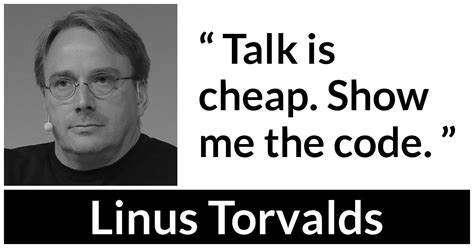

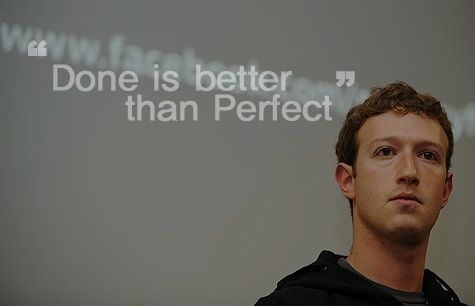